In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
! pip3 install -r /content/gdrive/MyDrive/cdt-gnn-returns/asos-gnn-returns-requirements-colab.txt

path = '/content/gdrive/MyDrive/cdt-gnn-returns/src'
os.chdir(path)
print(os.getcwd())
from io import RawIOBase
from typing import Callable, List, Optional
import os.path as osp
import torch
from torch_geometric.data import (HeteroData, InMemoryDataset, download_url,extract_zip)

import pandas as pd

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████▎               | 834.1 MB 1.2 MB/s eta 0:11:22tcmalloc: large alloc 1147494400 bytes == 0x20a4000 @  0x7f947674e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████▋           | 1055.7 MB 1.1 MB/s eta 0:08:32tcmalloc: large alloc 1434370048 bytes == 0x466fa000 @  0x7f947674e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████████████▏     | 1336.2 MB 1.2 

Above block is for environment setting, and the next block is building the graph network. 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class ASOSGnnDataNode2Vec(InMemoryDataset):
    r"""A heterogeneous rating dataset, assembled by GroupLens Research from
    the `MovieLens web site <https://movielens.org>`_, consisting of nodes of
    type :obj:`"movie"` and :obj:`"user"`.
    User ratings for movies are available as ground truth labels for the edges
    between the users and the movies :obj:`("user", "rates", "movie")`.

    Args:
        root (string): Root directory where the dataset should be saved.
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.HeteroData` object and returns a
            transformed version. The data object will be transformed before
            every access. (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.HeteroData` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
        model_name (str): Name of model used to transform movie titles to node
            features. The model comes from the`Huggingface SentenceTransformer
            <https://huggingface.co/sentence-transformers>`_.
    """

    def __init__(self, root, transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None,
                 model_name: Optional[str] = "asos-gnn-model"):
        self.model_name = model_name
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    reduced = 1
    
    if reduced ==1:
        # reduced data
        @property
        def raw_file_names(self) -> List[str]:
          # FULL DATASET
            # return [
            #     osp.join('gnn_reduced_data', 'customer_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_training_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'event_table_training_FULL.csv')
            #     osp.join('gnn_reduced_data', 'event_table_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'customer_nodes_testing_FULL.csv'),
            #     osp.join('gnn_reduced_data', 'product_nodes_testing_FULL.csv'),
            # ] 
            # TOY DATASET (ABOUT 1000 EXAMPLES)
            # return [
            #     osp.join('gnn_reduced_data', 'customers_training_sample.csv'),
            #     osp.join('gnn_reduced_data', 'products_training_sample.csv'),
            #     osp.join('gnn_reduced_data', 'events_training_sample.csv'),
            #     osp.join('gnn_reduced_data', 'events_testing_sample.csv'),
            #     osp.join('gnn_reduced_data', 'customers_testing_sample.csv'),
            #     osp.join('gnn_reduced_data', 'products_testing_sample.csv'),
            # ] 
           # SAMPLE DATASET (60,000 EXAMPLES)
            return [
                osp.join('gnn_reduced_data', 'customers_training_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'products_training_sample_v2.csv'),
                osp.join('gnn_reduced_data', 'events_training_sample_v2.csv')
                #osp.join('gnn_reduced_data', 'events_testing_sample_v2.csv'),
                #osp.join('gnn_reduced_data', 'customers_testing_sample_v2.csv'),
                #osp.join('gnn_reduced_data', 'products_testing_sample_v2.csv'),
            ] 
        @property
        def processed_file_names(self) -> str:
            return f'data_node2vec_reduced_{self.model_name}.pt'
        
    else:
        # full data    
        @property
        # def raw_file_names(self) -> List[str]:
        #     return [
        #         osp.join('sample_data', 'customers_training_sample.csv'),
        #         osp.join('sample_data', 'products_training_sample.csv'),
        #         osp.join('sample_data', 'events_training_sample.csv'),
        #         osp.join('sample_data', 'events_testing_sample.csv'),
        #     ]
        @property
        def processed_file_names(self) -> str:
            return f'data_node2vec_{self.model_name}.pt'

    def download(self):
        pass

    def process(self):
        # from sentence_transformers import SentenceTransformer

        data = HeteroData()

        # read customer, product, event tables and add one coloum represent the index
        # print(self.raw_paths[0],self.raw_paths[1],self.raw_paths[2])
        df_customers = pd.read_csv(self.raw_paths[0]).drop(["shippingCountry"],axis=1).dropna()
        df_customers.insert(0, "customer_index", range(0, len(df_customers)))
        df_products = pd.read_csv(self.raw_paths[1]).drop(["brandDesc"],axis=1).dropna()
        df_products.insert(0, "product_index",range(0, len(df_products)))
        df_events = pd.read_csv(self.raw_paths[2]).dropna()
        
        # merge the customer, products and events into one table
        df_events = df_events.merge(df_customers[["hash(customerId)", "customer_index"]], on="hash(customerId)", how="inner")
        df_events = df_events.merge(df_products[["variantID", "product_index"]], on="variantID", how="inner")
        
        # create the customer and products edge index and return edge index
        customer_src = torch.tensor(df_events["customer_index"])
        product_dst = torch.tensor(df_events["product_index"])
        edge_index = torch.stack([customer_src, product_dst])
        returned = torch.from_numpy(df_events['isReturned'].values).to(torch.bool)
        return_edge_index = edge_index[:,returned]


        # set the index of customer and product table and drop product type table
        df_customers = df_customers.set_index("customer_index")
        df_products = df_products.set_index("product_index")
        df_products = df_products.drop('productType', axis=1)

        data['customer'].x = torch.from_numpy(df_customers.to_numpy()).to(torch.float)        
        data['product'].x = torch.from_numpy(df_products.to_numpy()).to(torch.float)

        # create edge of "customer - purchases - product" fpr both train and test set
        data['customer', 'purchases', 'product'].edge_index = edge_index.to(torch.long)
        data['customer', 'purchases', 'product'].edge_label = returned.to(torch.long)
        data['product', 'purchased_by', 'customer'].edge_index = torch.flip(edge_index.to(torch.long), [0])
        

        # create the edge of "customer - returns- product" for both train and test
        data['customer', 'returns', 'product'].edge_index = return_edge_index.to(torch.long)
        data['product', 'returned_by', 'customer'].edge_index = torch.flip(return_edge_index.to(torch.long), [0])
        
        
        customer_nodes = int(edge_index[0].max() + 1)
        product_nodes = int(edge_index[1].max() + 1)
        data['customer'].num_nodes = customer_nodes
        data['product'].num_nodes = product_nodes
        
        data['customer'].node_index = torch.arange(0, customer_nodes)
        data['product'].node_index = torch.arange(0, product_nodes)

        
        if self.pre_transform is not None:
            data = self.pre_transform(data)

        torch.save(self.collate([data]), self.processed_paths[0])

Here is the data load block

In [ ]:
gnnData = ASOSGnnDataNode2Vec(root="../")
gnnData.process()
gnnData = ASOSGnnDataNode2Vec(root="../")
gnnData.process()
dataset = gnnData.data
dataset

HeteroData(
  customer={
    x=[63297, 30],
    num_nodes=63297,
    node_index=[63297]
  },
  product={
    x=[41935, 42],
    num_nodes=41935,
    node_index=[41935]
  },
  (customer, purchases, product)={
    edge_index=[2, 50276],
    edge_label=[50276]
  },
  (product, purchased_by, customer)={ edge_index=[2, 50276] },
  (customer, returns, product)={ edge_index=[2, 27367] },
  (product, returned_by, customer)={ edge_index=[2, 27367] }
)

Metapath2vec model setting

In [ ]:
from torch_geometric.nn import MetaPath2Vec

metapath = [
    # ("customer", "purchases", "product"),
    # ("product", "purchased_by", "customer"),
    ("customer", "returns", "product"),
    ("product", "returned_by", "customer")
]

# model = MetaPath2Vec(dataset.edge_index_dict,
#                      embedding_dim=128,
#                      metapath=metapath,
#                      walk_length=7,
#                      context_size=5,
#                      walks_per_node=7,
#                      num_negative_samples=5,
#                      sparse=True).to(device)


model = MetaPath2Vec(dataset.edge_index_dict,
                     embedding_dim=128,
                     metapath=metapath,
                     walk_length=10,
                     context_size=7,
                     walks_per_node=5,
                     num_negative_samples=5,
                     sparse=True).to(device)

In [ ]:
dataset.to(device)

HeteroData(
  customer={
    x=[63297, 30],
    num_nodes=63297,
    node_index=[63297]
  },
  product={
    x=[41935, 42],
    num_nodes=41935,
    node_index=[41935]
  },
  (customer, purchases, product)={
    edge_index=[2, 50276],
    edge_label=[50276]
  },
  (product, purchased_by, customer)={ edge_index=[2, 50276] },
  (customer, returns, product)={ edge_index=[2, 27367] },
  (product, returned_by, customer)={ edge_index=[2, 27367] }
)

In [ ]:
# optimizer and batch setting
loader = model.loader(batch_size=128, shuffle=True, num_workers=3)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node[src], transform_node[dst])
        for src, dst in link_examples
    ]

def link_prediction_classifier(max_iter = 2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter, 
                                  solver="lbfgs", penalty='l2')
    
    return Pipeline(steps=[("clf", lr_clf)])

# 2. training classifier
def train_link_prediction_model(link_examples, link_labels, get_embedding, binary_operator):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf

# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator)
    score = evaluate_scores(clf, link_features_test, link_labels_test)
    return score

def evaluate_scores(clf, link_features, link_labels):
    y_pred = clf.predict(link_features)

    return {
        "accuracy": accuracy_score(link_labels, y_pred),
        "f1_score": f1_score(link_labels, y_pred),
        "precision": precision_score(link_labels, y_pred),
        "recall": recall_score(link_labels, y_pred),
        "predictions" : y_pred
    }

def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

    
def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_l1(u, v):
    return np.abs(u - v)

def operator_l2(u, v):
    return (u - v) ** 2

def run_link_prediction(binary_operator, examples, labels, embedding, examples_test, labels_test):
    clf = train_link_prediction_model(
        examples, labels, embedding, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_test,
        labels_test,
        embedding,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_l1, operator_l2]

In [ ]:
import numpy as np
# loss_list = []
def train(epoch, log_steps=500, eval_steps=1000):
    model.train()
    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        # if (i + 1) % log_steps == 0:
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Loss: {total_loss / log_steps:.4f}'))
        #     total_loss = 0

        # if (i + 1) % eval_steps == 0:
        #     acc, f1 = test()
        #     print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
        #            f'Acc: {acc:.4f}, F1 score: {f1:.3f}'))
    # loss_list.append(total_loss)
    return(loss)



@torch.no_grad()
def test(train_ratio=0.7):
    model.eval()

    z_customer = model('customer', batch=dataset.node_index_dict['customer'].to(device)).detach()
    z_product = model('product', batch=dataset.node_index_dict['product'].to(device)).detach()
    
    examples = dataset.edge_index_dict["customer", "purchases", "product"].T
    labels = dataset.edge_label_dict["customer", "purchases", "product"]

    perm = torch.randperm(examples.size(0))
    train_perm = perm[:int(examples.size(0) * train_ratio)]
    test_perm = perm[int(examples.size(0) * train_ratio):]

    emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

    scores = run_link_prediction(operator_l1, examples[train_perm].cpu(), labels[train_perm].cpu(), emb_128, examples[test_perm].cpu(), labels[test_perm].cpu())["score"]
    

    return scores["accuracy"], scores["f1_score"], scores["precision"], scores["recall"], scores["predictions"]
   



In [ ]:
num_epoch = 20
epochlist = []
losslist = []
prescisionlist = []
f1scorelist = []
accuraylist = []
recalllist = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    losslist.append(loss)
    epochlist.append(epoch)
    acc2, f12, precision2, recall2, preds = test()
    prescisionlist.append(precision2)
    f1scorelist.append(f12)
    accuraylist.append(acc2)
    recalllist.append(recall2)
    print(f'Epoch: {epoch}, acc: {100*acc2:.2f}%, F1 score: {f12:.3f}, Precision: {precision2:.3f}, Recall: {recall2:.3f}')

Epoch: 1, acc: 55.96%, F1 score: 0.699, Precision: 0.557, Recall: 0.939
Epoch: 2, acc: 62.82%, F1 score: 0.680, Precision: 0.640, Recall: 0.725


KeyboardInterrupt: ignored

In [ ]:
num_epoch = 100
epochlist1 = []
losslist1 = []
prescisionlist1 = []
f1scorelist1 = []
accuraylist1 = []
recalllist1 = []
for epoch in range(1, num_epoch+1):
    loss = train(epoch)
    losslist1.append(loss)
    epochlist1.append(epoch)
    acc2, f12, precision2, recall2, preds = test()
    prescisionlist1.append(precision2)
    f1scorelist1.append(f12)
    accuraylist1.append(acc2)
    recalllist1.append(recall2)
    print(f'Epoch: {epoch}, acc: {100*acc2:.2f}%, F1 score: {f12:.3f}, Precision: {precision2:.3f}, Recall: {recall2:.3f}')

Epoch: 1, acc: 55.07%, F1 score: 0.695, Precision: 0.549, Recall: 0.944
Epoch: 2, acc: 63.00%, F1 score: 0.680, Precision: 0.638, Recall: 0.728
Epoch: 3, acc: 65.80%, F1 score: 0.691, Precision: 0.680, Recall: 0.704
Epoch: 4, acc: 68.79%, F1 score: 0.714, Precision: 0.720, Recall: 0.709
Epoch: 5, acc: 70.05%, F1 score: 0.719, Precision: 0.732, Recall: 0.706
Epoch: 6, acc: 70.97%, F1 score: 0.727, Precision: 0.755, Recall: 0.700
Epoch: 7, acc: 71.29%, F1 score: 0.726, Precision: 0.753, Recall: 0.701
Epoch: 8, acc: 72.30%, F1 score: 0.735, Precision: 0.765, Recall: 0.708
Epoch: 9, acc: 72.55%, F1 score: 0.739, Precision: 0.774, Recall: 0.707
Epoch: 10, acc: 72.54%, F1 score: 0.739, Precision: 0.771, Recall: 0.709
Epoch: 11, acc: 72.45%, F1 score: 0.736, Precision: 0.770, Recall: 0.704
Epoch: 12, acc: 71.99%, F1 score: 0.729, Precision: 0.762, Recall: 0.699
Epoch: 13, acc: 72.01%, F1 score: 0.732, Precision: 0.768, Recall: 0.699
Epoch: 14, acc: 72.58%, F1 score: 0.733, Precision: 0.773, R

In [ ]:
newlist = []
for ele in losslist:
  newlist.append(ele.cpu().detach().numpy())
newlist

[array(4.106782, dtype=float32),
 array(2.378523, dtype=float32),
 array(1.695683, dtype=float32),
 array(1.3366385, dtype=float32),
 array(1.1578664, dtype=float32),
 array(1.0860641, dtype=float32),
 array(1.0009832, dtype=float32),
 array(0.9511006, dtype=float32),
 array(0.9385968, dtype=float32),
 array(0.95034283, dtype=float32),
 array(0.9158263, dtype=float32),
 array(0.8964366, dtype=float32),
 array(0.8762033, dtype=float32),
 array(0.845755, dtype=float32),
 array(0.8206299, dtype=float32),
 array(0.81342226, dtype=float32),
 array(0.7895773, dtype=float32),
 array(0.7860137, dtype=float32),
 array(0.77617294, dtype=float32),
 array(0.7707874, dtype=float32),
 array(0.7594686, dtype=float32),
 array(0.7536993, dtype=float32),
 array(0.75492895, dtype=float32),
 array(0.7450395, dtype=float32),
 array(0.7449018, dtype=float32),
 array(0.7398683, dtype=float32),
 array(0.73907554, dtype=float32),
 array(0.7345418, dtype=float32),
 array(0.7323439, dtype=float32),
 array(0.7312

Text(0.5, 0, 'epoch')

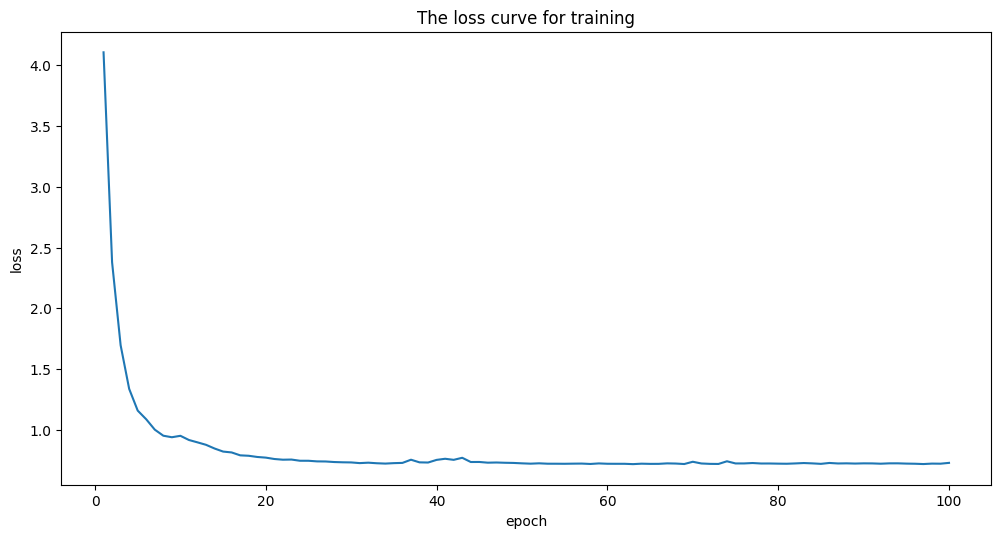

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6), dpi=100)
plt.title("The loss curve for training")
plt.plot(epochlist, newlist)
plt.ylabel('loss')
plt.xlabel('epoch')


In [ ]:
labels.size(0)

50276

In [ ]:
type(examples)

torch.Tensor

In [ ]:
train_ratio = 0.7
z_customer = model('customer', batch=dataset.node_index_dict['customer']).detach().detach()
z_product = model('product', batch=dataset.node_index_dict['product']).detach().detach()
examples = dataset.edge_index_dict["customer", "purchases", "product"].T
labels = dataset.edge_label_dict["customer", "purchases", "product"]

perm = torch.randperm(examples.size(0))
train_perm = perm[:int(examples.size(0) * train_ratio)]
test_perm = perm[int(examples.size(0) * train_ratio):]


train_examples = examples[train_perm]
train_labels = labels[train_perm]
examples_test = examples[test_perm]
labels_test = labels[test_perm]


emb_128 = np.concatenate((z_customer.cpu().numpy(), z_product.cpu().numpy()), axis=0)

np_labels = train_labels.cpu().numpy()
np_labels_test = labels_test.cpu().numpy()

# train embeddings
edge_embeddings = link_examples_to_features(train_examples, emb_128, operator_l2)
np_edge_embeddings = np.array(edge_embeddings)
positive_embeddings = []
negative_embeddings = []
for i in range(len(np_edge_embeddings)):
  if np_labels[i] == 0:
    negative_embeddings.append(np_edge_embeddings[i])
  else:
    positive_embeddings.append(np_edge_embeddings[i])

# test embeddings
edge_embeddings_test = link_examples_to_features(examples_test, emb_128, operator_l2)
np_edge_embeddings_test = np.array(edge_embeddings_test)
positive_embeddings_test = []
negative_embeddings_test = []

for i in range(len(np_edge_embeddings_test)):
  if np_labels_test[i] == 0:
    negative_embeddings_test.append(np_edge_embeddings_test[i])
  else:
    positive_embeddings_test.append(np_edge_embeddings_test[i])



Plots setting

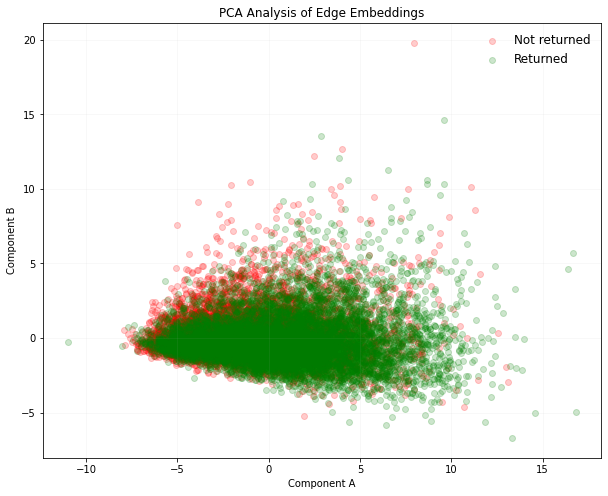

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
tsne = PCA()
#tsne = TSNE()
emb2d = tsne.fit_transform(edge_embeddings_test)

cdict = {0: "red", 1: "green"}
labeldict = {0: "Not returned", 1: "Returned"}

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
for i in range(0,2):
    ix = np.where(np_labels_test == i)
    ax.scatter(emb2d[ix,0],emb2d[ix,1], marker="o", alpha=0.2, color=cdict[i], label=labeldict[i])
ax.set_title("PCA Analysis of Edge Embeddings")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")
ax.grid(True, alpha=0.1)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
#tsne = PCA()
tsne = TSNE()
emb2d = tsne.fit_transform(edge_embeddings_test)

cdict = {0: "red", 1: "green"}
labeldict = {0: "Not returned", 1: "Returned"}

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
for i in range(0,2):
    ix = np.where(np_labels_test == i)
    ax.scatter(emb2d[ix,0],emb2d[ix,1], marker="o", alpha=0.2, color=cdict[i], label=labeldict[i])
ax.set_title("PCA Analysis of Edge Embeddings")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")
ax.grid(True, alpha=0.1)
plt.show()